# Fourier Transform



*   Fourier Transform is a coordinate transform
*   Idea: Approximating a function by a sum of sinusoids of increasing frequencies which form an orthogonal basis for the functions' space
* **Fourier Transform Pair**
  $$\hat{f}(\omega)= F(f(x))=\int_{-\infty}^\infty f(x)e^{-iωx}dx$$
  $$f(x)= F^{-1}(\hat{f}(\omega))=\frac{1}{2\pi}\int_{-\infty}^\infty \hat{f}(\omega)e^{iωx}dω$$

# Discrete Fourier Transform (DFT)



*   Mathematical Transformation written in terms of big matrix multiplication
  $$\hat{f}_k=\sum_{j=0}^{n-1} f_j e^{-2Πjk/2}$$
  $$f_k=(\sum_{j=0}^{n-1} \hat{f}_j e^{2Πjk/2})\frac{1}{n}$$
  $$\begin{equation*}
  \begin{pmatrix}
  \hat{f}_0 \\
  \hat{f}_1 \\
  \hat{f}_2 \\
  \vdots \\
  \hat{f}_n
  \end{pmatrix}=
  \begin{pmatrix}
  1 & 1 & \cdots & 1 \\
  1 & \omega_n & \omega^2_n & \cdots & \omega^{n-1}_n \\
  1 & \omega^2_n & \omega^4_n & \cdots & \omega^{2(n-1)}_n \\
  \vdots  & \vdots  & \vdots & \ddots  \\
  1 & \omega^{n-1}_n & \omega^{2(n-1)}_n& \cdots & \omega^{(n-1)^2}_n
  \end{pmatrix}
  \begin{pmatrix}
  f_0 \\
  f_1 \\
  f_2 \\
  \vdots \\
  f_n
  \end{pmatrix}
  \end{equation*}$$

  $$ω_n=e^{\frac{-2Πi}{n}}$$
* It is basically just a Fourier Series on Data instead of Analytic function
* Too expensive to compute the matrix and multiply data: $O(n^2)$
* ($\hat{f}$) are complex valued Fourier Coeffecients that represent what are the magnitude and phase of the sine and cosine components of increasing frequencies you would have to add up to get this data set
  * The magnitude indicates how important that particular frequency and the phase tells if it is more cosie or sine and what mixture

# Fast Fourier Transform (FFT)

*   It is how you compute a Fourier Series on a computer
*   The FFT is a computationally efficient way of computing the DFT
*   FFT is synonym to DFT
*   Applications: -
  * Solve PDEs
  * Denoising Data
  * Data Analysis
  * Compression
* Let $n=2^8=256$, Observations:-
 * Reorganizing the enteries of f
  $$\begin{equation*}
    \hat{f}=F_{256}
    f=
    \begin{pmatrix}
      I_{128} & -D_{128} \\
      I_{128} & -D_{128} \\
    \end{pmatrix}
    \begin{pmatrix}
      F_{128} & 0 & \\
      0 & F_{128}
      \end{pmatrix}
      \begin{pmatrix}
      f_{even} \\
      f_{odd} \\
    \end{pmatrix}
  \end{equation*}$$

$$⇓$$
$$Cheap Matrix Multiplication$$
.
  $$\begin{equation*}
  D_{128}=
    \begin{pmatrix}
      1 & 0 & \cdots & \cdots & 0 \\
      0 & \omega_n & 0  & \cdots & 0 \\
      \vdots & 0 & \omega^2_n & \cdots & 0 \\
      \vdots  & \vdots  &  \vdots & \ddots & \vdots \\
      0 & 0 & 0 & \cdots & \omega^{127}_n
    \end{pmatrix}
  \end{equation*}$$

  * For ($n \times n$) DFT, rearranging the data into even and odd indices gives us the ability to rearrange the matrix to a smaller simpler products and we can keep splitting till we have n=2
  $$F_{256} \rightarrow F_{128}\rightarrow F_{64} → ⋯ →F_{4}→F_{2}$$


# Polynimial Multiplication



* Why it is important?
Because it is equivalent to convolution (operation on vectors) which we use all the time in digital signal processing and image editing
* **Polynomial Representations**:-
  * Coeffecient Representation: $[P_0,P_1,...,P_d]$
  * Value Representation: representing polynomial of degree d by (d+1) points
* Multiplication in coeffs. representation is $O(d^2)$ and in value representation is $O(d)$
* To Calculate $A(x)B(x)$ if the coefficients $a_i$ and $b_i$ are stored in arrays $A[0 ⋯n]$ and $B[0 ⋯n]$ There are two ways:-
  * Brute_Force (Naive DFT) $→O(n^2)$
  * Divide and Conquer (FFT) $→O(nlogn)$






# Algorithm

**First: Brute Force**

In [1]:
def DFT(A, b):
  d = len(A)
  n = len(b)
  product = [0] * (d + n - 1)
  for i in range(d):
    for j in range(n):
      product[i + j] += A[i] * b[j]
  return product

def print_poly(poly):
  n = len(poly)
  for i in range(n):
    print(poly[i], end = "")
    if (i != 0):
      print("x^", i, end = "")
    if (i != n - 1):
      print(" + ", end = "")
  
# This array represents a polynomial function : 1 + 2x + 3x^2
A = [1,2,3]
# This array represents a polynomial function : 3 + 2x+ 2x^2
b = [3, 2, 2]



print("The first polynomial is ",)
print_poly(A)
print("\nThe second polynomial is ")
print_poly(b)

product = DFT(A, b)

print("\nProduct of two polynomials is ")
print_poly(product);

The first polynomial is 
1 + 2x^ 1 + 3x^ 2
The second polynomial is 
3 + 2x^ 1 + 2x^ 2
Product of two polynomials is 
3 + 8x^ 1 + 15x^ 2 + 10x^ 3 + 6x^ 4

**Second: Divide and Conquer (FFT)**

**Key Points**
  * Evaluation:-
    * splitting the polynomial into even and odd terms makes it easier to specify the value points
  $$ P(x_i)=P_e(x_i^2)+x_iP_o(x_i^2) $$
  $$ P(-x_i)=P_e(x_i^2)-x_iP_o(x_i^2) $$
  *$P_e(x^2)$ and $P_o(x^2)$ have degree $\frac{n}{2}-1$ and are now easier to solve
  * Then, $T(n)=2T(\frac{n}{2})+n=O(nlogn)$ by master method
  * Why complex numbers? It is an expansion of the initial points domain to make them always negative and positive paired
  * For a polynomial, $P(x)=P_0+P_1x+P_2x^2+...+P_dx^d$: we need $n\geq(d+1)$ points, $n=2^k,k \in Z$, points are $n^{th}$ roots of unity
  * $-ω^j=ω^{j+\frac{n}{2}}$ (property of roots of unity)
  * Finally,
  $$P(ω^j)=P_e(ω^{2j})+ω^jP_o(ω^{2j})$$
  $$P(ω^{j+\frac{n}{2}})=P_e(ω^{2j})-ω^jP_o(ω^{2j})$$
  $$j\in {0,1,....,(\frac{n}{2}-1)}$$


In [2]:
from math import *
import numpy as np

In [3]:
def FFT(P):
  n=len(P) # Here, n is a power of 2
  
  if n==1: # Base Case
    return P
  
  theta=(2*pi)/n
  omega=list(complex(cos(theta*i),sin(theta*i)) for i in range(n))

  Peven,Podd=P[::2],P[1::2] # Divide
  feven,fodd=FFT(Peven),FFT(Podd) # Conquer
  
  f=[0]*n
  for i in range((n//2)): # Merge
    f[i]=feven[i]+(omega[i])*fodd[i] 
    f[i+(n//2)]=feven[i]-(omega[i])*fodd[i]
  return f



def IFFT(P):
  n=len(P) # Here, n is a power of 2
  
  if n==1: # Base Case
    return P
  
  theta=-(2*pi)/n
  omega=list((1/n)*complex(cos(theta*i),sin(theta*i)) for i in range(n))

  Peven,Podd=P[::2],P[1::2] # Divide
  feven,fodd=IFFT(Peven),IFFT(Podd) # Conquer

  f=[0]*n
  for i in range((n//2)): # Merge
    f[i]=feven[i]+(omega[i])*fodd[i]
    f[i+(n//2)]=feven[i]-(omega[i])*fodd[i]
  return f

# Application: Denoising Data with FFT

Steps to denoise data:-
  1.   Convert the polynomials from coeffs. representation to value representation
  2.   Multiply
  3.   Convert the polynomial back to coeffs. representation

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['figure.figsize']=[10,8]
plt.rcParams.update({'font.size':18})

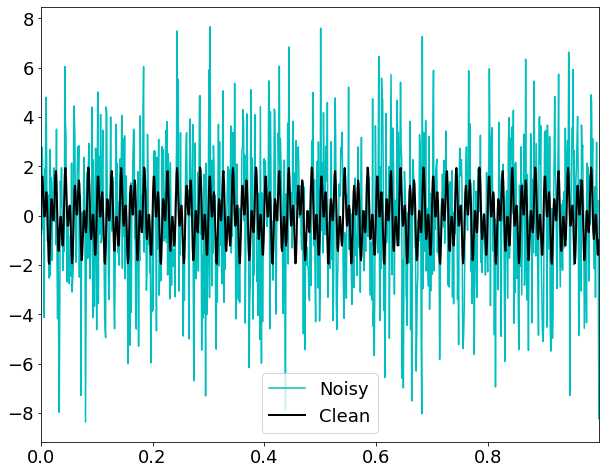

In [29]:
# Creating a simple signal with two frequencies
dt = 0.001
t=np.arange(0,1,dt)
f=np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)
cleanf=f
f=f+2.5*np.random.randn(len(t)) # Adding noise to the function

plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,cleanf,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


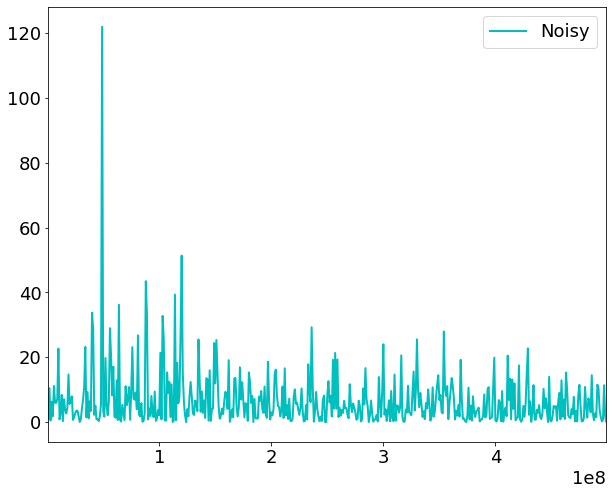

In [31]:
n=len(t)
fhat=FFT(f)
PSD=fhat*np.conj(fhat)/n # Power Spectrum Density to compute the magnitude of each Fourier Coefficient squared
freq=((1/dt*n))*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype='int')

plt.plot(freq[L],PSD[L],color='c', LineWidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

In [33]:
# Using PSD to filter out noise
indices=PSD>100 # Finding all frequencies with large power
PSDclean=PSD*indices # Zero out all others
fhat=indices*fhat # Zero out small Fourier Coeffs. in Y
ffilt=IFFT(fhat)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


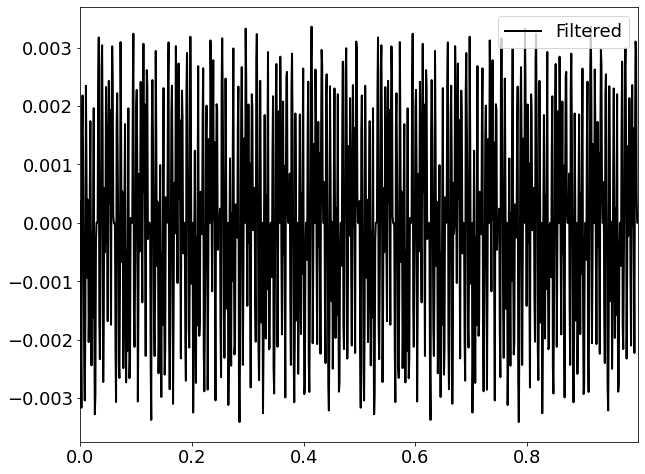

In [34]:
plt.plot(t,ffilt,color='k',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


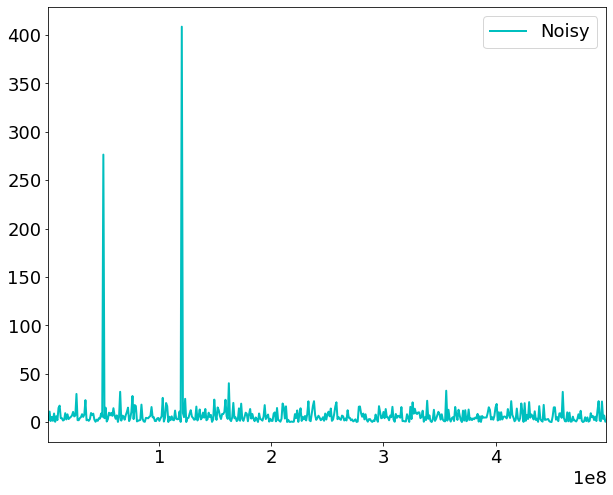

In [32]:
n=len(t)
fhat=np.fft.fft(f,n)
PSD=fhat*np.conj(fhat)/n # Power Spectrum Density to compute the magnitude of each Fourier Coefficient squared
freq=((1/dt*n))*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype='int')

plt.plot(freq[L],PSD[L],color='c', LineWidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

In [23]:
# Using PSD to filter out noise
indices=PSD>100 # Finding all frequencies with large power
PSDclean=PSD*indices # Zero out all others
fhat=indices*fhat # Zero out small Fourier Coeffs. in Y
ffilt=np.fft.ifft(fhat)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


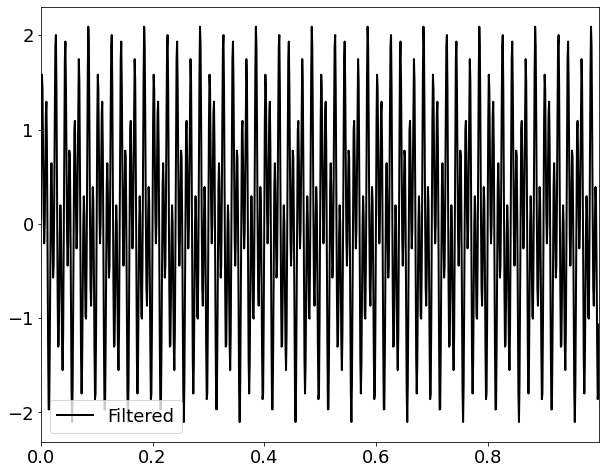

In [24]:
plt.plot(t,ffilt,color='k',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

# Resources

[The Fast Fourier Transform (FFT): Most Ingenious Algorithm Ever?](https://https://www.youtube.com/watch?v=h7apO7q16V0&ab_channel=Reducible)

[FFT Example: Unraveling the Recursion](https://www.youtube.com/watch?v=Ty0JcR6Dvis&ab_channel=Reducible)

[MIT Divide & Conquer: FFT](https://www.youtube.com/watch?v=iTMn0Kt18tg&ab_channel=MITOpenCourseWare)

[MIT Complex Matrices; Fast Fourier Transform](https://www.youtube.com/watch?v=M0Sa8fLOajA&ab_channel=MITOpenCourseWare)

[Fourier Analysis](https://www.youtube.com/playlist?list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC)

[But what is the Fourier Transform? A visual introduction.](https://www.youtube.com/watch?v=spUNpyF58BY&ab_channel=3Blue1Brown)

[Introduction to the Fourier Transform](https://www.youtube.com/watch?v=1JnayXHhjlg&ab_channel=BrianDouglas)